In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from requests import get
from bs4 import BeautifulSoup
from os import listdir
from os.path import isfile, join, isdir


Load data


In [34]:
import chardet
RELATIVE_DATA_PATH = './data'

# Load metadata
metadata = pd.read_csv(join(RELATIVE_DATA_PATH, 'metadata.csv'))
metadata.set_index(['SamplingPoint'], inplace = True)

# Load data
countries = [f for f in listdir(RELATIVE_DATA_PATH) if isdir(join(RELATIVE_DATA_PATH, f))]

frames = []
for country in countries:
    print(f"Parsing {country}")
    pollutantsPath = join(RELATIVE_DATA_PATH, country)
    pollutants = [f for f in listdir(pollutantsPath) if isdir(join(pollutantsPath, f)) ]
    
    for pollutant in pollutants:
        print(f"Parsing pollutant {pollutant}")
        pollutantPath = join(pollutantsPath, pollutant)
        dataCSVs = [f for f in listdir(pollutantPath)]
        
        for dataCSV in dataCSVs:
            dataCSVPath = join(pollutantPath, dataCSV)
            
            with open(dataCSVPath, 'rb') as f:
                info = chardet.detect(f.read())
                currentCSV = pd.read_csv(dataCSVPath, sep=',', encoding=info.get('encoding'))
                frames.append(currentCSV)
            
data = pd.concat(frames)

# Remove Redundant columns
data.drop('SamplingProcess', 1, inplace = True)
data.drop_duplicates(keep="first", inplace=True) 

# Convert data columns
data.DatetimeBegin = pd.to_datetime(data.DatetimeBegin)
data.DatetimeEnd = pd.to_datetime(data.DatetimeEnd)

# Set index
data.set_index(['DatetimeBegin'], inplace = True)

# Sort by index (by DatetimeBegin)
data.sort_index(inplace=True)


Parsing CH
Parsing pollutant SO2
Parsing pollutant CO
Parsing pollutant PM10
Parsing pollutant O3
Parsing pollutant NO2
Parsing pollutant PM2.5


/Users/so/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



Data


In [35]:
data.head(5)


,AirPollutant,AirPollutantCode,AirQualityNetwork,AirQualityStation,AirQualityStationEoICode,AveragingTime,Concentration,Countrycode,DatetimeEnd,Namespace,Sample,SamplingPoint,UnitOfMeasurement,Unnamed: 0,Validity,Verification,xCountrycode
DatetimeBegin,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+01:00,NO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,NET-CH003A,STA-CH0011A,CH0011A,hour,38.7,CH,2013-01-01 01:00:00+01:00,CH.BAFU.AQ,SPO_F-CH0011A_00008_500_502,SPO-CH0011A_00008_500,µg/m3,NaN,1.0,1.0,NaN
2013-01-01 00:00:00+01:00,SO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,NET-CH009A,STA-CH0041A,CH0041A,hour,17.9,CH,2013-01-01 01:00:00+01:00,CH.BAFU.AQ,SPO_F-CH0041A_00001_100_100,SPO-CH0041A_00001_100,µg/m3,NaN,1.0,1.0,NaN
2013-01-01 00:00:00+01:00,O3,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,NET-CH010A,STA-CH0024A,CH0024A,hour,27.3,CH,2013-01-01 01:00:00+01:00,CH.BAFU.AQ,SPO_F-CH0024A_00007_100_101,SPO-CH0024A_00007_100,µg/m3,NaN,1.0,1.0,NaN
2013-01-01 00:00:00+01:00,SO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,NET-CH003A,STA-CH0010A,CH0010A,hour,18.4,CH,2013-01-01 01:00:00+01:00,CH.BAFU.AQ,SPO_F-CH0010A_00001_500_502,SPO-CH0010A_00001_500,µg/m3,NaN,1.0,1.0,NaN
2013-01-01 00:00:00+01:00,SO2,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,NET-CH003A,STA-CH0002R,CH0002R,hour,0.4,CH,2013-01-01 01:00:00+01:00,CH.BAFU.AQ,SPO_F-CH0002R_00001_100_102,SPO-CH0002R_00001_100,µg/m3,NaN,1.0,1.0,NaN


Metadata


In [36]:
metadata.sample(5)


,Countrycode,Namespace,AirQualityNetwork,AirQualityStation,AirQualityStationNatCode,AirQualityStationEoICode,AirQualityStationArea,SamplingProcess,Sample,BuildingDistance,...,MeasurementEquipment,MeasurementType,MeasurementMethod,AirPollutantCode,AirPollutant,AirQualityStationType,Projection,Longitude,Latitude,Altitude
SamplingPoint,,,,,,,,,,,,,,,,,,,,,
SPO-FR04018_00001_100,FR,FR.LCSQA-INERIS.AQ,NET-FR004A,STA-FR04018,FR04018,FR04018,urban,SPP-FR_A_UV-FL_12000,SPO_F-FR04018_00001_100_100,-999.0,...,NaN,automatic,http://dd.eionet.europa.eu/vocabulary/aq/measu...,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,SO2,background,EPSG:4979,2.384700,48.903900,42.0
SPO-BG0051A_00038_500,BG,BG.BG-ExEA.AQ,NET-BG001A,STA-BG0051A,Pld2,BG0051A,urban,SPP-BG_A_chemi_horibaAPNA370,SPO_F-BG0051A_00038_500_500,35.0,...,http://dd.eionet.europa.eu/vocabulary/aq/measu...,automatic,http://dd.eionet.europa.eu/vocabulary/aq/measu...,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,NO,background,EPSG:4979,24.765239,42.142889,166.0
SPO-SE17572_00719_100,SE,SE.NV.AQ,NET-SE0015C,STA-SE17572,17572,SE17572,rural-regional,SPP-SE17572_00719_100_100,NaN,-999.0,...,NaN,passive,NaN,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,SO4--,background,EPSG:4979,12.914083,61.575598,480.0
SPO-FI00621_07380_100,FI,FI.FMI.AQ,NET-FI002A,STA-FI00621,621,FI00621,rural-remote,SPP-FI_N_GC-MS_PUF-sampler,SPO_F-FI00621_07380_100_100,-999.0,...,NaN,active,NaN,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,"Benzo(b,j,k)fluoranthene",background,EPSG:4979,24.283330,61.861110,170.0
SPO.DE_DENI071_PM10_Ni_dataGroup3,DE,http://gdi.uba.de/arcgis/rest/services/inspire...,NET.DE_NI,STA.DE_DENI071,DENI071,DENI071,suburban,SPP.DE_DENI071_PM10_Ni_active_HVSauto30_ICP_MS...,SAM.DE_DENI071_2,7.0,...,NaN,active,NaN,http://dd.eionet.europa.eu/vocabulary/aq/pollu...,Ni in PM10,traffic,EPSG:4979,10.422750,51.613650,273.0


In [37]:
# Print shape of data
data.shape


(659878, 17)

# Pollutants: 

We can see the following charts stating how different pollutants level affect our health.

![Pollutants levels description](img/pollutantsLevelsDescription.jpg)
![Pollutants levels ](img/pollutantsLevels.jpg)

At first, we are going to focus only on Switzerland (more exactly, an AirQualityStation around Lausanne) and explore different pollutants variation throughout time (both short term and long term).



In [49]:
# Get switzerland's data
switzerland = data[ data.Countrycode == 'CH']

# To do: Pick a station in Lausanne 
# It would be cool to analyze the place we are living
switzerlandPoint = switzerland[ switzerland.AirQualityStation == 'STA-CH0002R']
pollutants = data.AirPollutant.unique()



###  Histogram


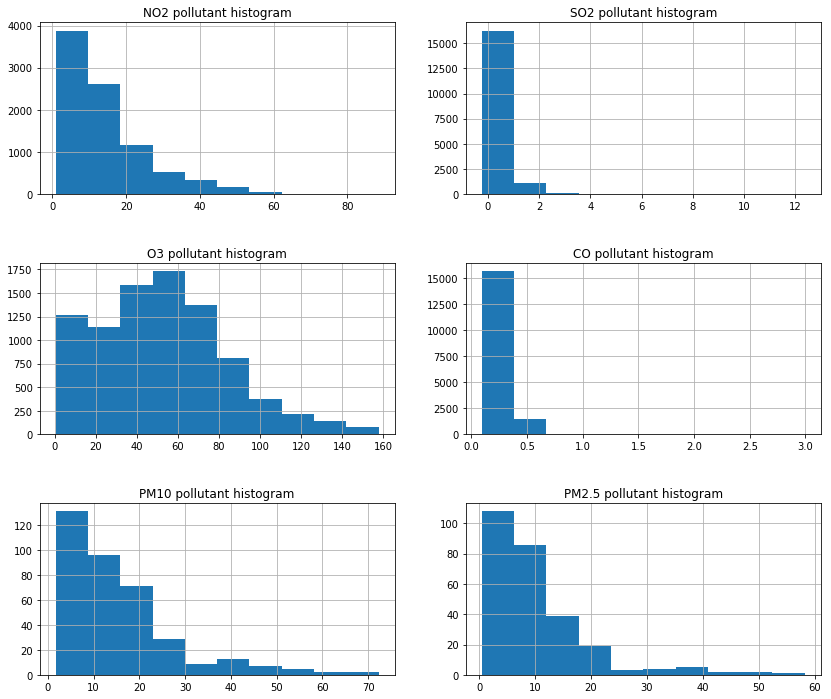

In [50]:
ncols = 2
nrows = len(pollutants) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols = ncols, figsize=(14, 4 * nrows))
plt.subplots_adjust(hspace = 0.4)

i = 0
j = 0
for pollutant in pollutants:
    pollutantData = switzerlandPoint[ switzerlandPoint.AirPollutant == pollutant ]
    pollutantData.Concentration.hist(ax=axes[i // ncols, j])
    axes[i // ncols, j].title.set_text(f"{pollutant} pollutant histogram")
    i += 1
    j += 1
    j %= ncols
    

### Variation plots (through all of history)


/Users/so/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


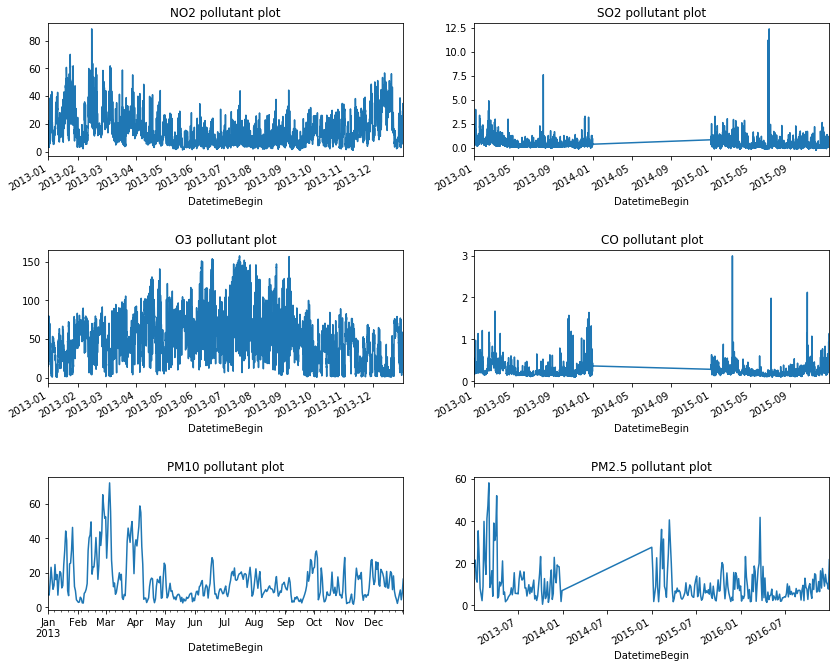

In [52]:
ncols = 2
nrows = len(pollutants) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols = ncols, figsize=(14, 4 * nrows))
plt.subplots_adjust(hspace = 0.7)

i = 0
j = 0
for pollutant in pollutants:
    pollutantData = switzerlandPoint[ switzerlandPoint.AirPollutant == pollutant ]
    pollutantData.Concentration.plot(ax=axes[i // ncols, j])
    axes[i // ncols, j].title.set_text(f"{pollutant} pollutant plot")
    i += 1
    j += 1
    j %= ncols



### Going more in depth

We are trying to see correlations between the time of day.

During the night we can observe the lowest amount of NO2, oppositly the levels of NO2 seem to peak at evening. Also days seems to follow the same pattern.


### 24hrs plots


/Users/so/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=734883.9583333334, right=734883.9583333334
  ax.set_xlim(left, right)


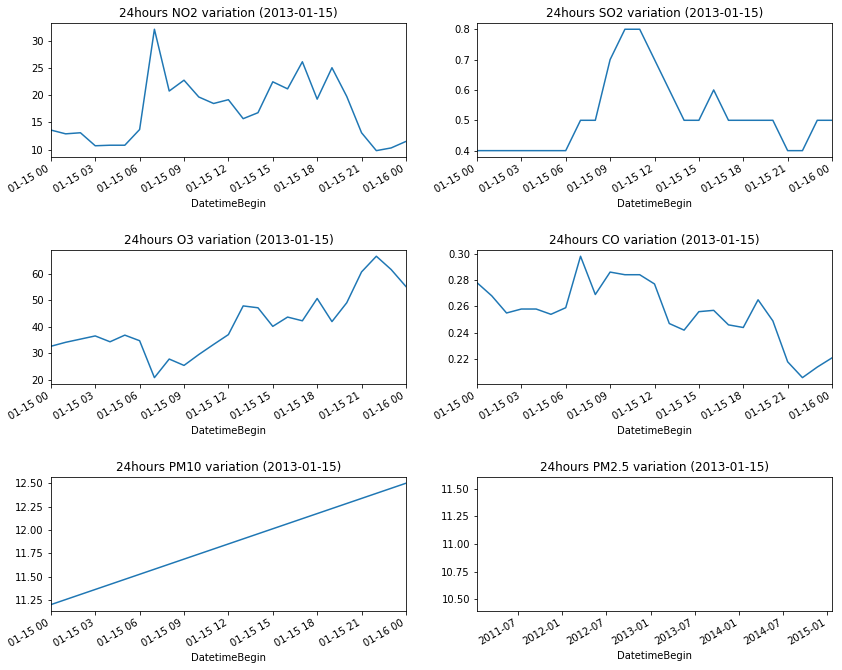

In [53]:
ncols = 2
nrows = len(pollutants) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols = ncols, figsize=(14, 4 * nrows))
plt.subplots_adjust(hspace = 0.7)

i = 0
j = 0
for pollutant in pollutants:
    pollutantData = switzerlandPoint[ switzerlandPoint.AirPollutant == pollutant ]
    pollutantData.loc['2013-01-15 00:00:00+0100':'2013-01-16 00:00:00+0100'].Concentration.plot(ax=axes[i // ncols, j])
    axes[i // ncols, j].title.set_text(f"24hours {pollutant} variation (2013-01-15)")
    i += 1
    j += 1
    j %= ncols
    
    

### 96hrs plots
Every color represents a different day.


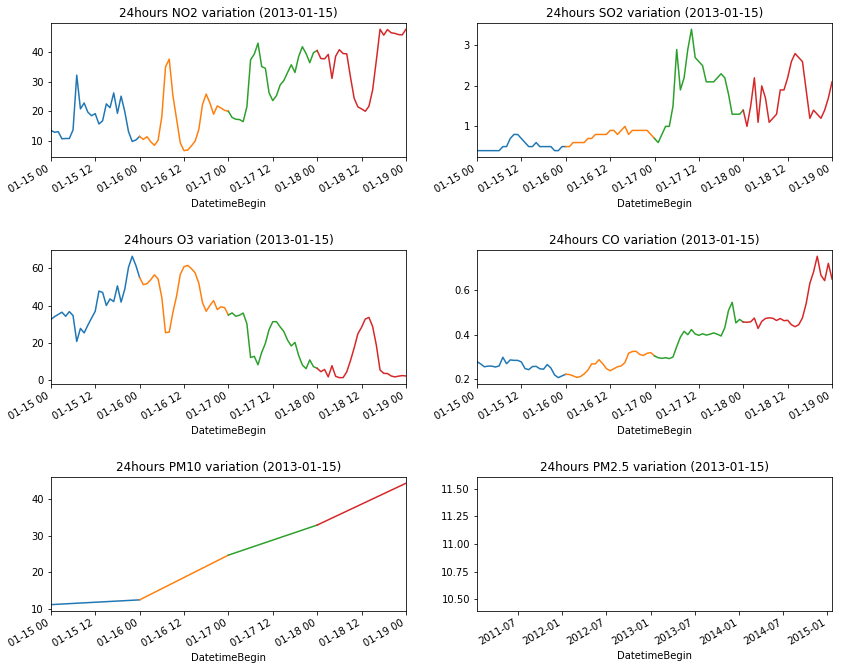

In [54]:
ncols = 2
nrows = len(pollutants) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols = ncols, figsize=(14, 4 * nrows))
plt.subplots_adjust(hspace = 0.7)

i = 0
j = 0
for pollutant in pollutants:
    pollutantData = switzerlandPoint[ switzerlandPoint.AirPollutant == pollutant ]
    try:
        pollutantData.loc['2013-01-15 00:00:00+0100':'2013-01-16 00:00:00+0100'].Concentration.plot(ax=axes[i // ncols, j])
        pollutantData.loc['2013-01-16 00:00:00+0100':'2013-01-17 00:00:00+0100'].Concentration.plot(ax=axes[i // ncols, j])
        pollutantData.loc['2013-01-17 00:00:00+0100':'2013-01-18 00:00:00+0100'].Concentration.plot(ax=axes[i // ncols, j])
        pollutantData.loc['2013-01-18 00:00:00+0100':'2013-01-19 00:00:00+0100'].Concentration.plot(ax=axes[i // ncols, j])
    except:
        pass
    axes[i // ncols, j].title.set_text(f"24hours {pollutant} variation (2013-01-15)")
    i += 1
    j += 1
    j %= ncols


### 1 year plots
Every color represents a different month.


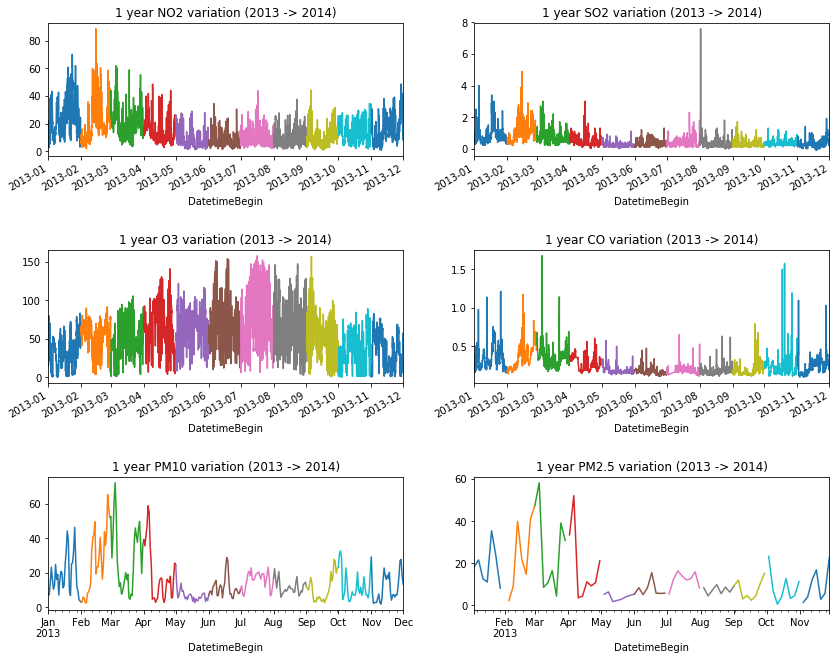

In [55]:
ncols = 2
nrows = len(pollutants) // ncols
fig, axes = plt.subplots(nrows=nrows, ncols = ncols, figsize=(14, 4 * nrows))
plt.subplots_adjust(hspace = 0.7)

i = 0
j = 0
for pollutant in pollutants:
    pollutantData = switzerlandPoint[ switzerlandPoint.AirPollutant == pollutant ]
    try:
        for x in range(11):
            fromTime = '2013-'+ str(x + 1) +'-01 00:00:00+0100'
            untilTime = '2013-'+ str(x + 2) +'-01 00:00:00+0100'
            pollutantData.loc[fromTime:untilTime].Concentration.plot(ax=axes[i // ncols, j])
    except:
        pass
    
    axes[i // ncols, j].title.set_text(f"1 year {pollutant} variation (2013 -> 2014)")
    i += 1
    j += 1
    j %= ncols

    
